In [107]:
import pandas as pd
import numpy as np
import re
import random
import matplotlib.pyplot as plt
import seaborn as sns
# import pandas_profiling as pp
# import folium
import json
# import pydeck as pdk
# import geopandas as gpd
# Í∑∏ÎûòÌîÑÎ•º ÎÖ∏Ìä∏Î∂Å ÏïàÏóê Í∑∏Î¶¨Í∏∞ ÏúÑÌï¥ ÏÑ§Ï†ï
%matplotlib inline

# ÌïÑÏöîÌïú Ìå®ÌÇ§ÏßÄÏôÄ ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º Í∞ÄÏ†∏Ïò¥
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from IPython.display import set_matplotlib_formats

# Í∑∏ÎûòÌîÑÏóêÏÑú ÎßàÏù¥ÎÑàÏä§ Ìè∞Ìä∏ Íπ®ÏßÄÎäî Î¨∏Ï†úÏóê ÎåÄÌïú ÎåÄÏ≤ò
mpl.rcParams['axes.unicode_minus'] = False
print ('Î≤ÑÏ†Ñ: ', mpl.__version__)
print ('ÏÑ§Ïπò ÏúÑÏπò: ', mpl.__file__)
print ('ÏÑ§Ï†ï ÏúÑÏπò: ', mpl.get_configdir())
print ('Ï∫êÏãú ÏúÑÏπò: ', mpl.get_cachedir())
print ('ÏÑ§Ï†ï ÌååÏùº ÏúÑÏπò: ', mpl.matplotlib_fname())
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

# ttf Ìè∞Ìä∏ Ï†ÑÏ≤¥Í∞úÏàò
print(len(font_list))
font_list_mac = fm.win32InstalledFonts()
print(len(font_list_mac))
f = [f.name for f in fm.fontManager.ttflist]
print(len(font_list))
# 10Í∞úÏùò Ìè∞Ìä∏ Î™Ö Îßå Ï∂úÎ†•
# print(fm.fontManager.ttflist)
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Gothic' in f.name]
path = 'C:\\WINDOWS\\Fonts\\malgun.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
print(font_name)
plt.rc('font', family=font_name)
set_matplotlib_formats('retina')

Î≤ÑÏ†Ñ:  3.1.0
ÏÑ§Ïπò ÏúÑÏπò:  c:\project\venv\dacon\lib\site-packages\matplotlib\__init__.py
ÏÑ§Ï†ï ÏúÑÏπò:  C:\Users\dhkim\.matplotlib
Ï∫êÏãú ÏúÑÏπò:  C:\Users\dhkim\.matplotlib
ÏÑ§Ï†ï ÌååÏùº ÏúÑÏπò:  c:\project\venv\dacon\lib\site-packages\matplotlib\mpl-data\matplotlibrc
367
372
367
Malgun Gothic


In [118]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from konlpy.tag import Twitter
from collections import Counter


In [560]:
# names = ['ÏûëÏÑ±ÏãúÍ∞Ñ','ÏûëÏÑ±Ïûê','ÏúÑÏπò','ÎÇ¥Ïö©','Ï¢ãÏïÑÏöîÏàò','Ìï¥Ïâ¨ÌÉúÍ∑∏']
# crawling_data = pd.read_csv('ÏÑúÍµêÎèô.txt', sep="\t", names=names)
crawling_data = pd.read_csv('ÏÑúÍµêÎèô_Ï§ëÎ≥µÏ†úÍ±∞.txt', sep="\t", header=0)
crawling_data.tail(5)
print(crawling_data.shape)

(3395, 7)


In [561]:
crawling_data = crawling_data.drop_duplicates()
crawling_data.shape
# crawling_data.to_csv("ÏÑúÍµêÎèô_Ï§ëÎ≥µÏ†úÍ±∞.txt",sep="\t")

(3395, 7)

In [562]:
timedata = crawling_data['ÏûëÏÑ±ÏãúÍ∞Ñ']
day_data = timedata.str.slice(stop=10)
hour = timedata.str.slice(start=11,stop=-11)
year = day_data.str.slice(stop=4)
month = day_data.str.slice(start=5,stop=7)
day = day_data.str.slice(start=8,stop=10)
post_crawl = crawling_data.copy()
post_crawl['year'] = year
post_crawl['month'] = month
post_crawl['day'] = day
post_crawl['hour'] = hour
post_crawl = post_crawl[['year','month','ÏûëÏÑ±Ïûê','hour','ÏúÑÏπò','Ìï¥Ïâ¨ÌÉúÍ∑∏','Ï¢ãÏïÑÏöîÏàò']]
# daydata = timedata

In [563]:
def process_hash_tag(df):
    df["Ìï¥Ïâ¨ÌÉúÍ∑∏"] = df["Ìï¥Ïâ¨ÌÉúÍ∑∏"].str.split("_") 
    results = []
    for row in df['Ìï¥Ïâ¨ÌÉúÍ∑∏']:
#         print(row)
        if row is np.nan:
            results.append(0)
        else:
            temp = []
            for x in row:
                try:
                    if len(x)>0 and x[0]=="#":
                        temp.append(x[1:])
                except SyntaxError:
                    temp.append(x)
            if temp == []:
                temp =0
            results.append(temp)
    df['Ìï¥Ïâ¨ÌÉúÍ∑∏'] = results


In [564]:
process_hash_tag(post_crawl)
post_crawl

year month         ÏûëÏÑ±Ïûê hour  \
0     2020    03     hchooo_   09   
1     2020    02     pil2076   12   
2     2020    04     siiiido   07   
3     2020    04  unum_by_un   07   
4     2020    02   menyajoon   11   
...    ...   ...         ...  ...   
3390  sarr    we     ÎßàÌè¨Íµ¨_ÏÑúÍµêÎèô        
3391  up.s     _     ÎßàÌè¨Íµ¨_ÏÑúÍµêÎèô        
3392  syoi     i     ÎßàÌè¨Íµ¨_ÏÑúÍµêÎèô        
3393  ynhk    ng     ÎßàÌè¨Íµ¨_ÏÑúÍµêÎèô        
3394  sy_e    _m     ÎßàÌè¨Íµ¨_ÏÑúÍµêÎèô        

                                                     ÏúÑÏπò  \
0                                                   ÏÑúÍµêÎèô   
1                                                   ÏÑúÍµêÎèô   
2                                                   ÏÑúÍµêÎèô   
3                                                   ÏÑúÍµêÎèô   
4                                                   ÏÑúÍµêÎèô   
...                                                 ...   
3390  ./Ïã±Ïã±Ìïú_Îî∏Í∏∞Í∞Ä_Îßâ_ÎèÑÏ∞©ÌñàÏñ¥Ïöî:D/Îî∏Í∏∞Ïö∞Ïú†Îûë_ÌÉÄÎ•¥Ìä∏_ÎßéÏù¥_ÎßåÎì§Ïñ¥_ÎÜìÏùÑÍªòÏö©/././...   
3391  ÎØ∏ÏâêÎ¶∞_1Ïä§ÌÉÄ_ÏÑúÍµêÎèô_ÏôïÏú°ÏÑ±ÏâêÌîÑÎãòÏùò_Ï§ëÏãùÎãπ_ÏßÑÏßÑ!!/ÌïúÏ£º_ÎÖ∏ÎèôÏ£º_1Ï∞®Î°ú_Í≥†Í≥†Í≥†!!!...   
3392                    Ïú†ÏÇ∞ÏÜå_3ÏãúÍ∞Ñ_=_Ïñ¥Ï†úÏùò_ÏàôÏ∑®_Ìï¥Í≤∞_ÏôÑÎ£å_üçªü•Çüçæü§∏üèª‚Äç‚ôÄÔ∏è   
3393  #Îπ†ÏÇêÏöîÎú®_#ÍπåÎ•¥ÌÜ†ÏπòÏò§_#Ïù¥Î¶ÑÏù¥Î≠êÎì†Í∞ÑÏóê_#Î≥ëÏñ¥_#ÎßùÏõêÏãúÏû•_#ÎÑ§ÎßàÎ¶¨ÎßåÏõê/././#Îç∞Ïùº...   
3394  #Îä¶ÏùÄÏ†êÏã¨#ÏÑúÍµêÎèô#ÌôÄÎ°úÌÇ§Ïπú#Ï©°ÏõêÏù¥Îûë#Î¥âÍ≥®Î†àÌååÏä§ÌÉÄ#Î°úÏ†úÏÉàÏö∞ÌååÏä§ÌÉÄ#ÎßõÏûàÎã§Í∑∏Îû®#ÌååÏä§ÌÉÄÍ∑∏Îû®...   

                                        Ìï¥Ïâ¨ÌÉúÍ∑∏  \
0                                          0   
1     [ÍπÄÎèôÌïú, KIMDONGHAN, D, OUIentertainment]   
2                       [Ï°∞ÎçòÌíãÎÇ¥Í∏∞, Ï°∞ÎçòÏã†Ï∂úÎÇ¥Í∏∞, ÏÉàÏπúÍµ¨]   
3                                          0   
4                                          0   
...                                      ...   
3390                                       0   
3391                                       0   
3392                                       0   
3393                                       0   
3394                                       0   

                                                   Ï¢ãÏïÑÏöîÏàò  
0                                                   360  
1                                                   285  
2                                                 3,110  
3                                                   465  
4                                                   166  
...                                                 ...  
3390  #ÏÇ¨Î•¥Î•¥Í≥ºÏûêÏ†ê_#ÏÇ¨Î•¥Î•¥ÌÉÄÎ•¥Ìä∏_#Îî∏Í∏∞ÌÉÄÎ•¥Ìä∏_#365ÏùºÏÉùÎî∏Í∏∞ÏÇ¨Ïö©_#ÏÇ¨Î•¥Î•¥_#ÏàòÏ†úÎîîÏ†ÄÌä∏_...  
3391  #ÏÑúÍµêÎèôÎßõÏßë_#ÏôïÏú°ÏÑ±ÏÖ∞ÌîÑ_#ÏßÑÏßÑ_#ÎÖ∏ÎèôÏ£º_#Ïù¥Ï†úÏãúÏûë_#ÎØ∏ÏâêÎ¶∞Í∞ÄÏù¥Îìú_#ÎØ∏ÏâêÎ¶∞1Ïä§ÌÉÄ_#...  
3392                                                NaN  
3393  #Îπ†ÏÇêÏöîÎú®_#ÍπåÎ•¥ÌÜ†ÏπòÏò§_#Ïù¥Î¶ÑÏù¥Î≠êÎì†Í∞ÑÏóê_#Î≥ëÏñ¥_#ÎßùÏõêÏãúÏû•_#ÎÑ§ÎßàÎ¶¨ÎßåÏõê_#Îç∞ÏùºÎ¶¨_#Ïùº...  
3394  #Îä¶ÏùÄÏ†êÏã¨_#ÏÑúÍµêÎèô_#ÌôÄÎ°úÌÇ§Ïπú_#Ï©°ÏõêÏù¥Îûë_#Î¥âÍ≥®Î†àÌååÏä§ÌÉÄ_#Î°úÏ†úÏÉàÏö∞ÌååÏä§ÌÉÄ_#ÎßõÏûàÎã§Í∑∏Îû®...  

[3395 rows x 7 columns]

In [565]:
tag_post = post_crawl[post_crawl["Ìï¥Ïâ¨ÌÉúÍ∑∏"]!=0]
print(tag_post.shape)
tags = tag_post["Ìï¥Ïâ¨ÌÉúÍ∑∏"]

(1719, 7)


In [566]:
all_tags = np.concatenate(np.array(tags))
post_all_tags = []
for tag in all_tags:
    if ("Ïù∏Ïä§ÌÉÄÍ∑∏Îû®" in tag) or ("Ïù∏Ïä§ÌÉÄ" in tag) or ("ÏÑúÍµêÎèô" in tag) or ("ÌôçÎåÄ" in tag) or (tag=="ÎßûÌåî") or (tag=="ÏÜåÌÜµ") and not ("Îç∞Ïù¥Ìä∏" in tag):
        continue
    elif (tag=="ÏÑ†Ìåî") or (tag=="Ï¢ãÏïÑÏöî") or (tag=="follow") or (tag=="daily") or (tag=="ÏùºÏÉÅ") or (tag=="ÏÑ†ÌåîÌïòÎ©¥ÎßûÌåî") or ("Ï¢ãÏïÑÏöîÎ∞òÏÇ¨"==tag):
        continue
    elif ("Ïó∞ÎÇ®" in tag) or ("Ìï©Ï†ï" in tag) or("Ï¢ãÏïÑÏöîÎ∞òÏÇ¨"==tag) or ("ÎßõÏßë" in tag)  or ("ÎßùÏõêÎèô" in tag):
        continue
    elif ("ÏùºÏÉÅ" in tag) or ("Îç∞ÏùºÎ¶¨" in tag):
        continue
    elif "Ïä§ÌÉÄÍ∑∏Îû®" in tag:
#         print(tag)
        newtag = "".join(tag.split("Ïä§ÌÉÄÍ∑∏Îû®"))
        if len(newtag)==1:
            newtag = tag
#         print(newtag)
    elif ("Ïä§ÌÉÄ" in tag) and ("ÎûçÏä§ÌÉÄ" not in tag) and ("ÌååÏä§ÌÉÄ" not in tag) and ("Ïä§ÌÉÄÏùº" not in tag):
#         print(tag)
        newtag = "".join(tag.split("Ïä§ÌÉÄ"))
        if len(newtag)==1:
            newtag = tag
#         print(newtag)
    elif "Í∑∏Îû®" in tag:
#         print(tag)
        newtag = "".join(tag.split("Í∑∏Îû®"))
        if len(newtag)==1:
            newtag = tag
#         print(newtag)
    else:
        newtag = tag
    post_all_tags.append(newtag)
post_all_tags


['ÍπÄÎèôÌïú',
 'KIMDONGHAN',
 'D',
 'OUIentertainment',
 'Ï°∞ÎçòÌíãÎÇ¥Í∏∞',
 'Ï°∞ÎçòÏã†Ï∂úÎÇ¥Í∏∞',
 'ÏÉàÏπúÍµ¨',
 'ÌôàÏπ¥Ìéò',
 'ÎçîÏπòÏª§Ìîº',
 'ÌôîÍ∞Ä',
 'ÏÑ±ÏòÅÎ°ù',
 'ÌÜ†ÎãàÌÜ†ÎãàÏµ∏Ìåå',
 'Ïµ∏Ìåå',
 'ÌÅ¨Î¶¨Ïä§ÎßàÏä§',
 'ÏÑ†Î¨º',
 'Ïµ∏ÌååÎ≥ºÌéú',
 'ÏãúÎ∂ÄÏïºÏ∂úÏã†',
 'bluemonday',
 'üíô',
 'üéº',
 'üéß',
 'Ïπ¥Ìéò',
 'Ïó¨Ïú†',
 'ÏÜåÌÜµÌï¥Ïöî',
 'Ïª§Ìîº',
 'Ïπ¥Ìéò',
 'Ïπ¥Ìéò',
 'ÏïÑÎ©îÎ¶¨Ïπ¥ÎÖ∏',
 'ÎÖπÏ∞®ÎùºÎñº',
 'coffee',
 'cafe',
 'ÏÑúÏö∏Ïπ¥Ìéò',
 'ÌÅ¨Î¶¨Ïä§ÎßàÏä§',
 'ÏóêÏπ¥Î•¥',
 'Ïó¥Ï†ïÏóêÍ∏∞Î¶ÑÎ∂ìÍ∏∞',
 'Ïó¥Í∏∞',
 'Í≤üÏä§ÎßàÌä∏Î™®ÏûÑ',
 'ÏÑ±Ïû•Î™®ÏûÑ',
 'Ïñ∏ÏóÑ',
 'ÏßÑÎØ∏ÏãùÎãπ',
 'Í∞ÑÏû•Í≤åÏû•',
 'soycrab',
 'ÏÑúÍµêÎÖ∏ÎèôÏûê',
 'ÌóàÏñ∏Ï¶ù',
 'instagram',
 'instagood',
 'Î®πÏä§ÌÉÄÍ∑∏Îû®',
 'ÎßõÏä§ÌÉÄÍ∑∏Îû®',
 'instadaily',
 'instalike',
 'instafood',
 'dailygram',
 'ÌåîÎ°úÏö∞',
 'f4f',
 'Ïù∏Ïπú',
 'fallow',
 'fallowme',
 'f',
 'in',
 'Ïô∏Íµ≠Ïù∏',
 'Í¥ÄÍ∞ù',
 'Í∏∞Î∂ÑÏµúÍ≥†',
 'awesome',
 'hongdae',
 'Ïù∏ÎîîÎ∞¥Îìú',
 'Ïã±Ïñ¥ÏÜ°ÎùºÏù¥ÌÑ∞',
 'ÎÖ∏ÏûêÏòÅ',
 'ÎÆ§ÏßÄÏÖò',
 'Ïñ¥Ïø†Ïä

In [567]:
len([x for x in post_all_tags if 'Ïπ¥Ìéò' in x])

389

In [568]:
# [x for x in post_all_tags if ('ÌÉÄÌà¨' in x) and not ('ÌÉÄÌà¨'==x)]
tatoo_num = len([x for x in post_all_tags if ('ÌÉÄÌà¨' in x) and not ('ÌÉÄÌà¨'==x)])

In [569]:
tatoo_num

427

In [570]:
count = Counter(post_all_tags)
words = dict(count.most_common())

In [571]:
def add_counts(keyword,words):
    new_words = words.copy()
    add_val = 0
    for key,value in words.items():
        if (keyword in key) and (keyword != key):
#             print(f'keyword : {keyword}, key : {key}')
            add_val += value
    new_words[keyword] = add_val
    return new_words

def del_word(keyword,words):
    new_words = words.copy()
    del(new_words[keyword])
    return new_words

In [572]:
new_words = add_counts("Ïπ¥Ìéò",words)
new_words = add_counts("ÎßõÏßë",new_words)
new_words = add_counts("ÏòÅÌôî",new_words)
new_words = add_counts("ÌÉÄÌà¨",new_words)
new_words = add_counts("Ïú†Ìïô",new_words)
new_words = add_counts("Îç∞Ïù¥Ìä∏",new_words)
words['Ïπ¥Ìéò']
new_words['Ïπ¥Ìéò']
# new_words

304

In [573]:
new_words2 = del_word("Ïπ¥Ìéò",words)
new_words2 = del_word("Ïª§Ìîº",new_words2)
new_words2 = del_word("Î®πÏä§ÌÉÄÍ∑∏Îû®",new_words2)
new_words2 = del_word("ÎßõÏä§ÌÉÄÍ∑∏Îû®",new_words2)

# new_words2 = del_word("ÎßõÏßë",new_words2)
# new_words2 = del_word("Ìï©Ï†ïÎßõÏßë",new_words2)
# new_words2 = del_word("ÌôçÎåÄÎßõÏßë",new_words2)
# new_words2 = del_word("Ïó∞ÎÇ®ÎßõÏßë",new_words2)
# new_words2 = del_word("ÌôçÎåÄÏπ¥Ìéò",new_words2)
# new_words2 = del_word("ÏÑúÍµêÎèôÏπ¥Ìéò",new_words2)
# new_words2 = del_word("Ìï©Ï†ïÏπ¥Ìéò",new_words2)
# new_words2 = del_word("ÏÑúÍµêÎèô",new_words2)
    

In [574]:
def draw_bar_graph(words,save_name):
    col1 = words.keys()
    col2 = words.values()

    df_words = pd.DataFrame()
    df_words['Îã®Ïñ¥'] = col1
    df_words['ÎπàÎèÑÏàò'] = col2
    top30 = df_words.nlargest(30,'ÎπàÎèÑÏàò')

    plt.figure(figsize=(23,4))
    sns.barplot(data=top30,x='Îã®Ïñ¥',y='ÎπàÎèÑÏàò')
    plt.savefig(f"{save_name}_ÎπàÎèÑÏàòÎ∂ÑÏÑù.png")

In [575]:
def draw_wordcloud(words,save_name):
    wordcloud = WordCloud(font_path = 'C:/Windows/Fonts/malgun.ttf',
                          background_color='white',
                          colormap = "Accent_r",
                          width=1500,
                          height=1000).generate_from_frequencies(words)
    plt.figure(figsize=(20,10))
    plt.imshow(wordcloud) 
    plt.axis('off') 
    plt.show()
    plt.savefig(f"{save_name}_ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú.png")


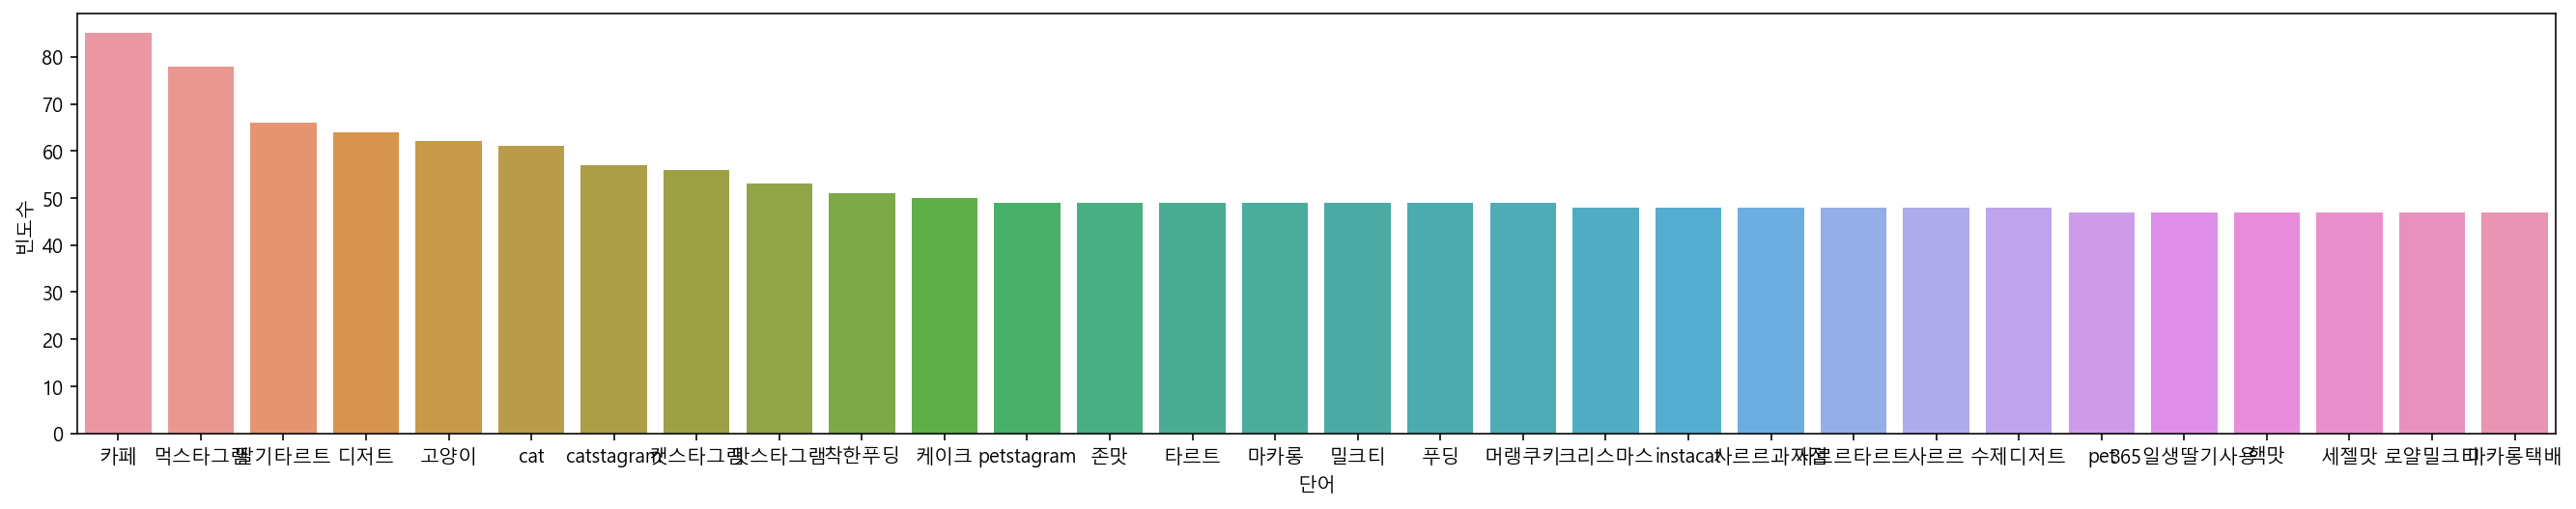

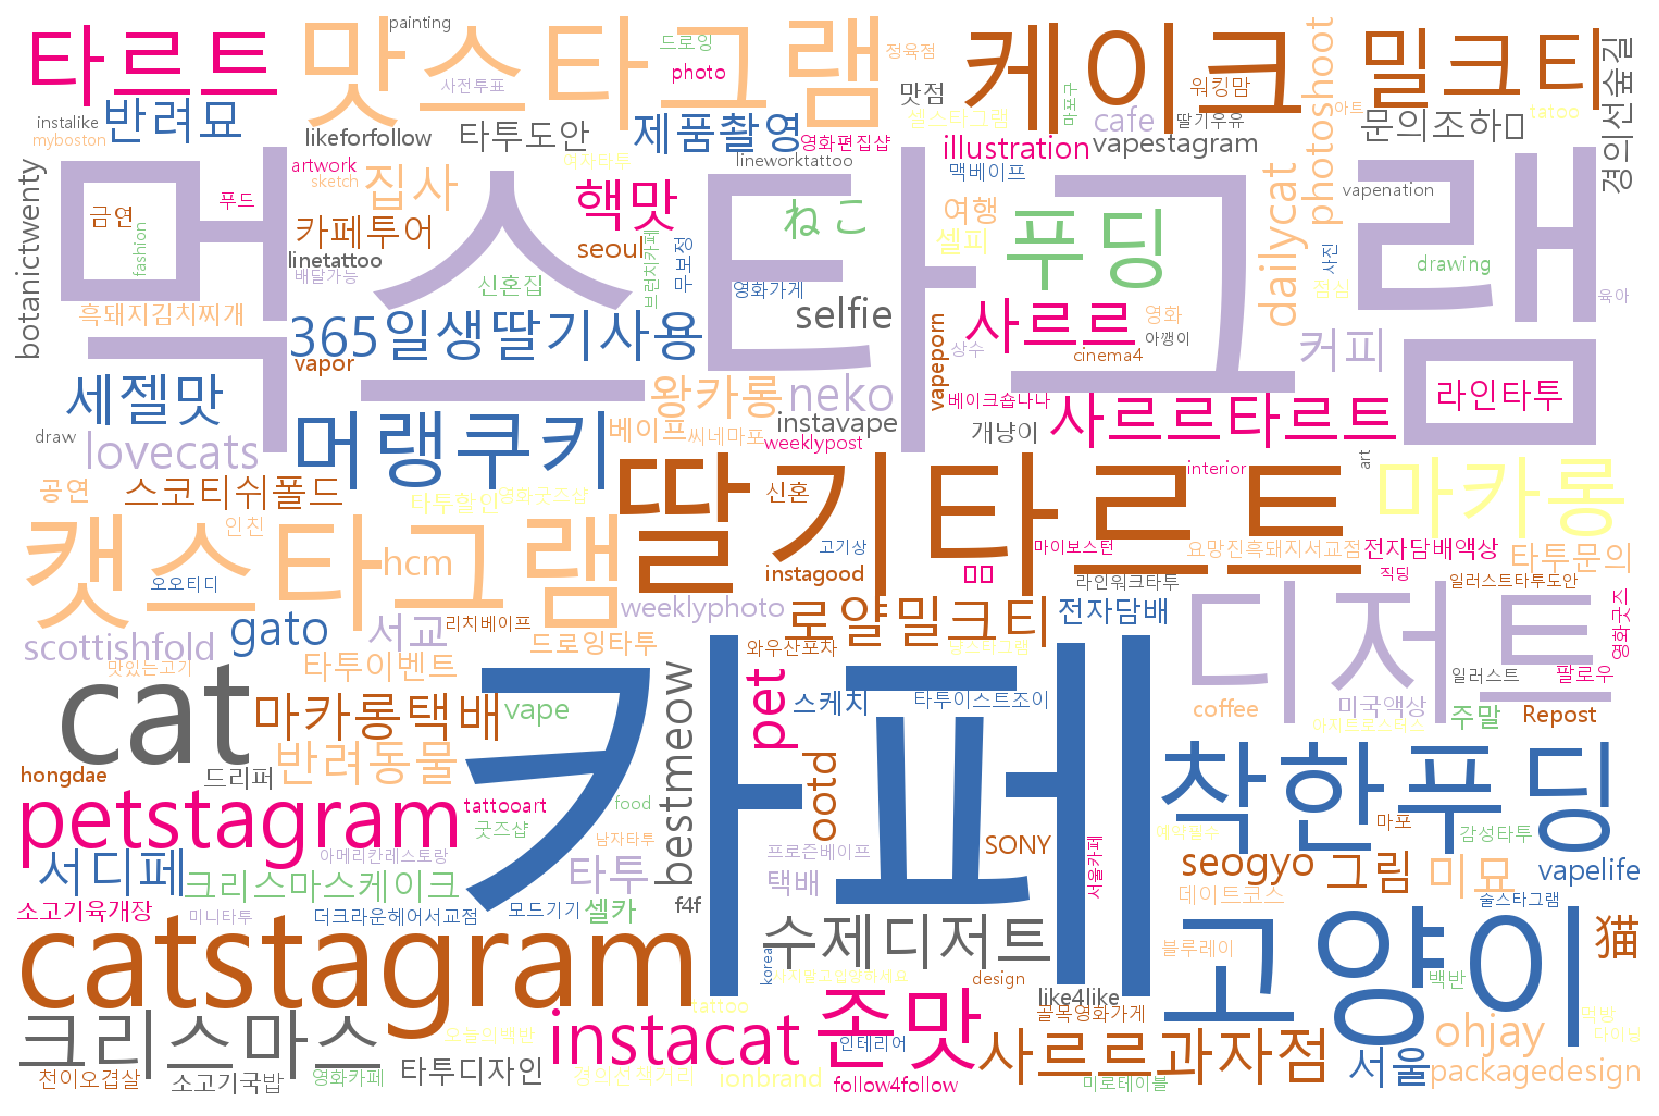

<Figure size 432x288 with 0 Axes>

In [576]:
draw_bar_graph(words,"ÏÑúÍµêÎèô")
draw_wordcloud(words,"ÏÑúÍµêÎèô")

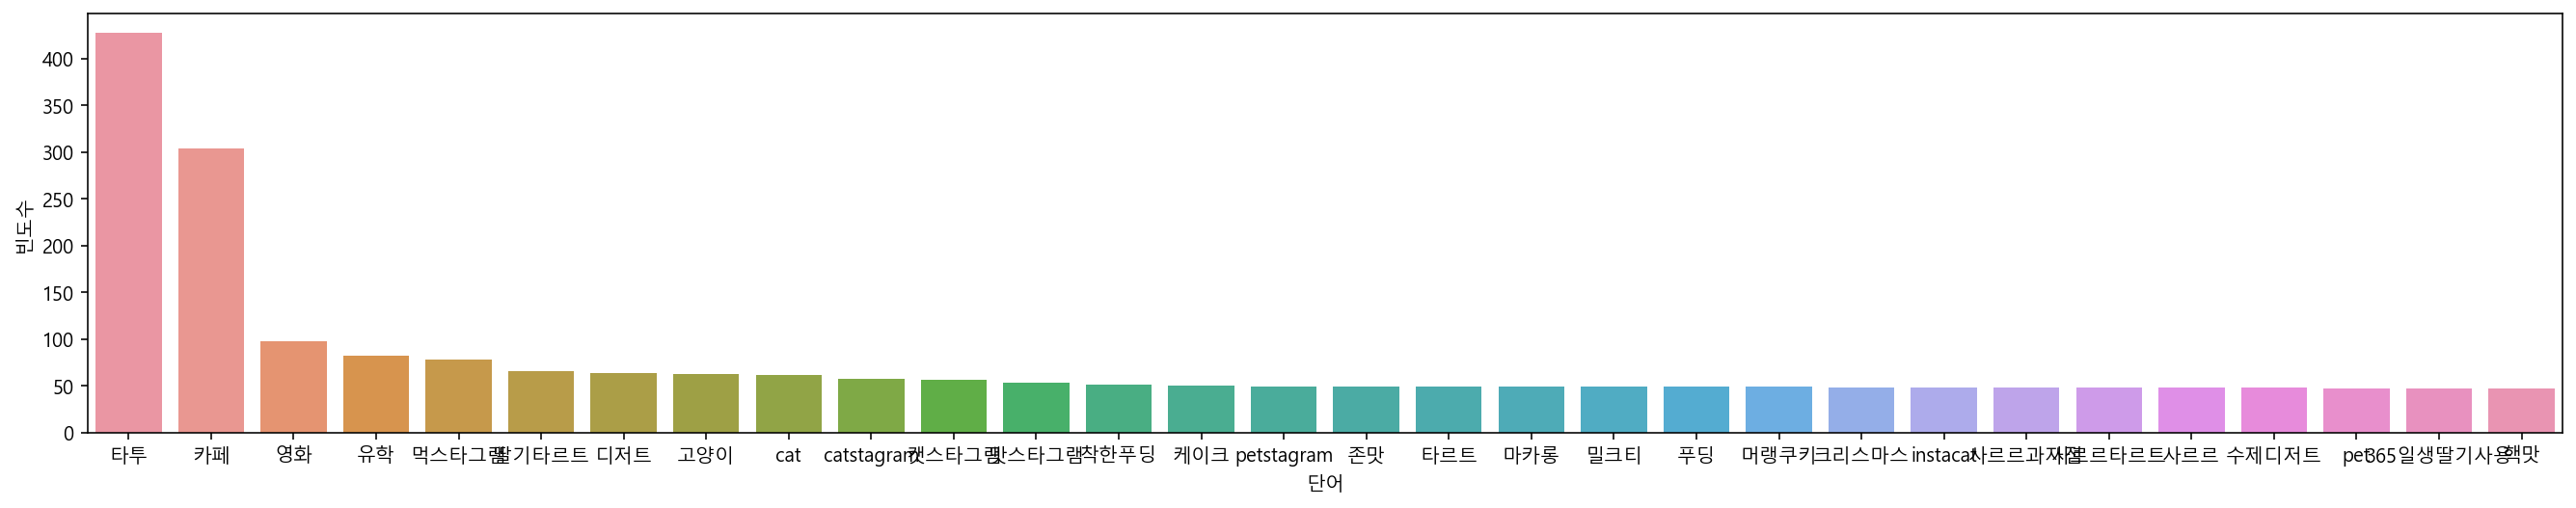

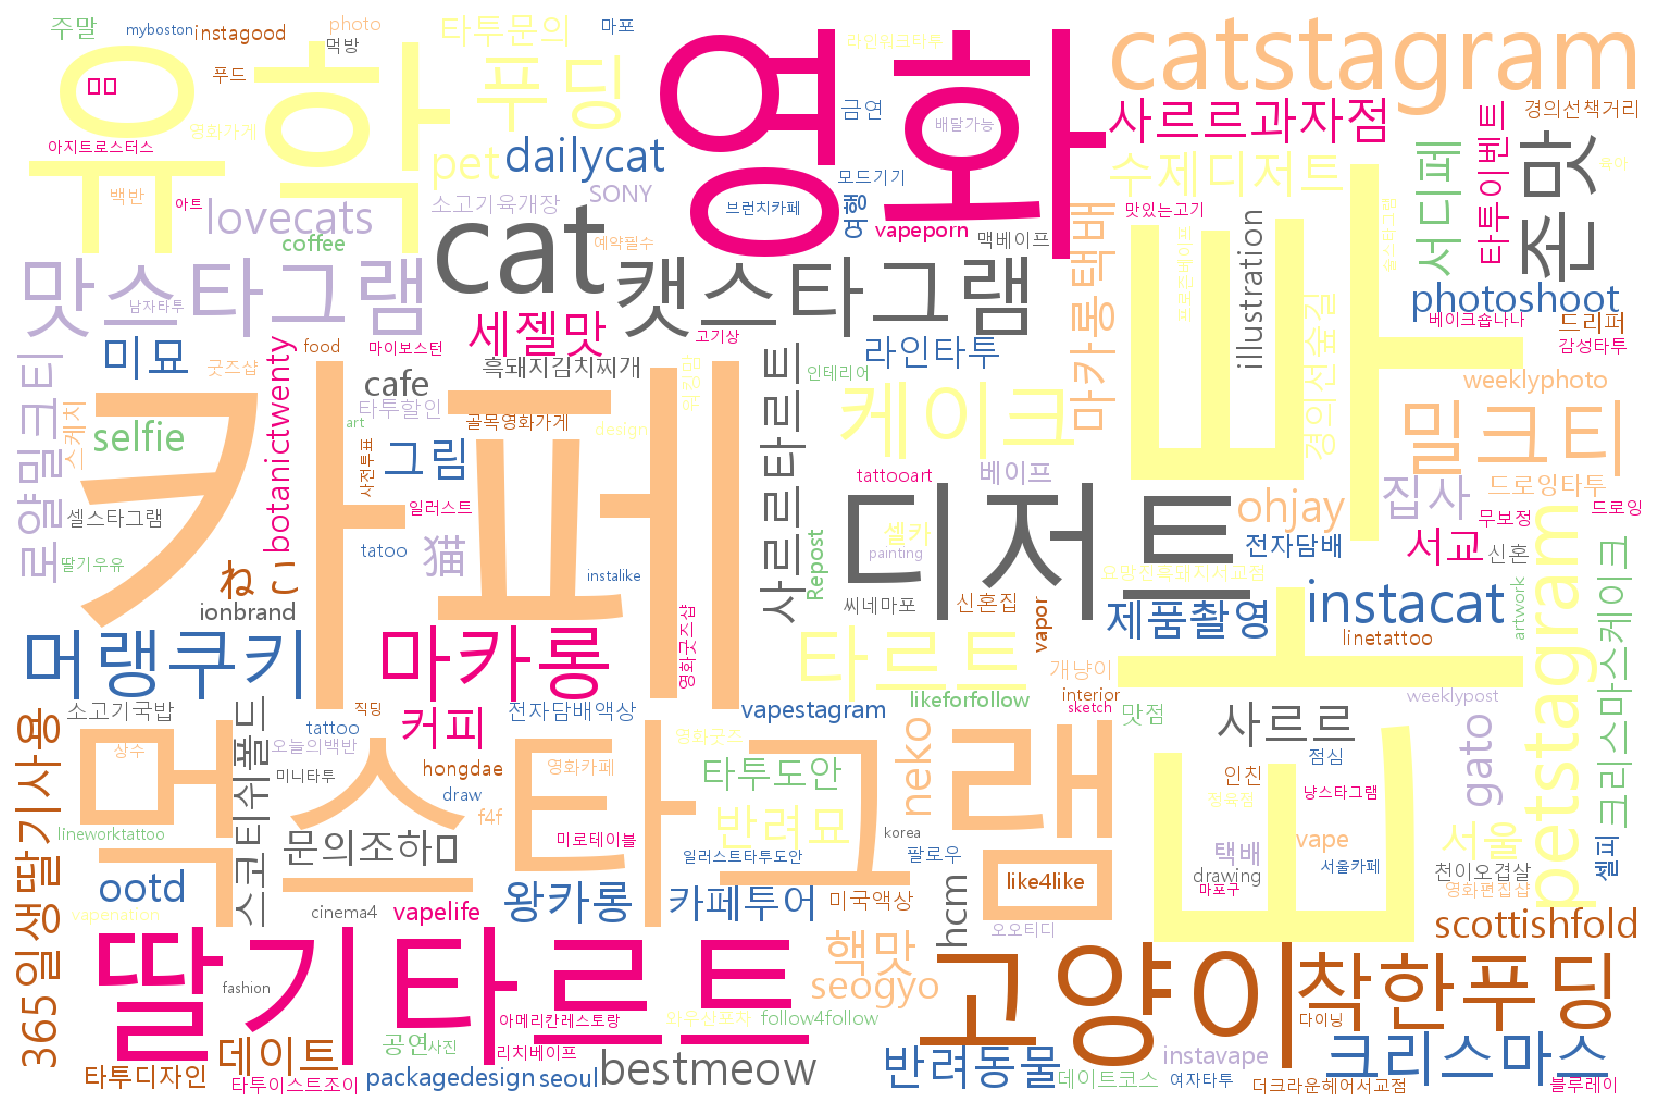

<Figure size 432x288 with 0 Axes>

In [577]:
draw_bar_graph(new_words,"ÏÑúÍµêÎèô_Îã®Ïñ¥ÏßëÍ≥Ñ")
draw_wordcloud(new_words,"ÏÑúÍµêÎèô_Îã®Ïñ¥ÏßëÍ≥Ñ")

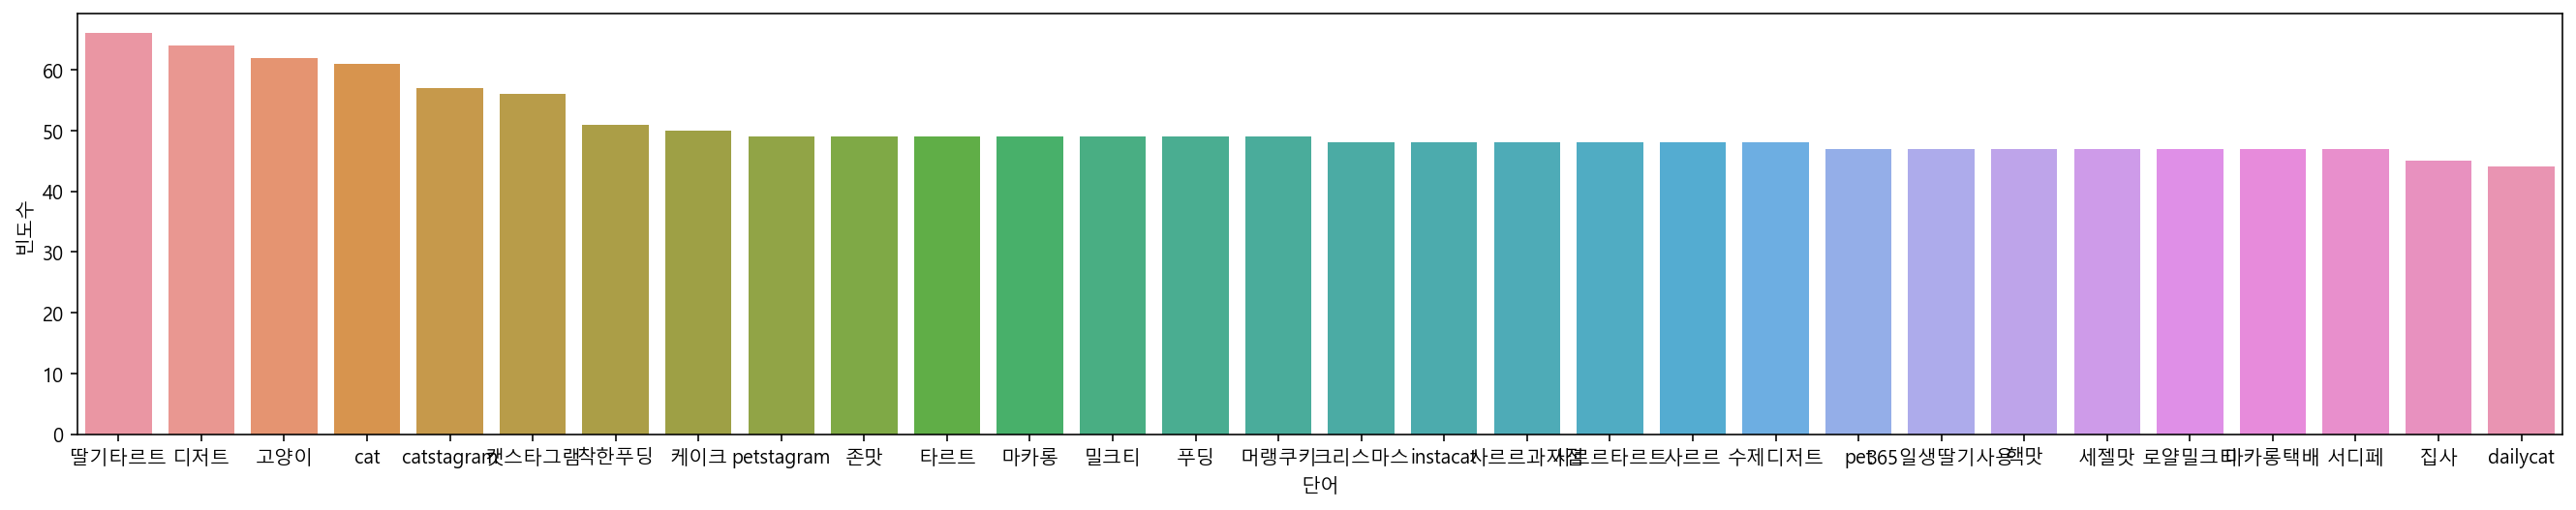

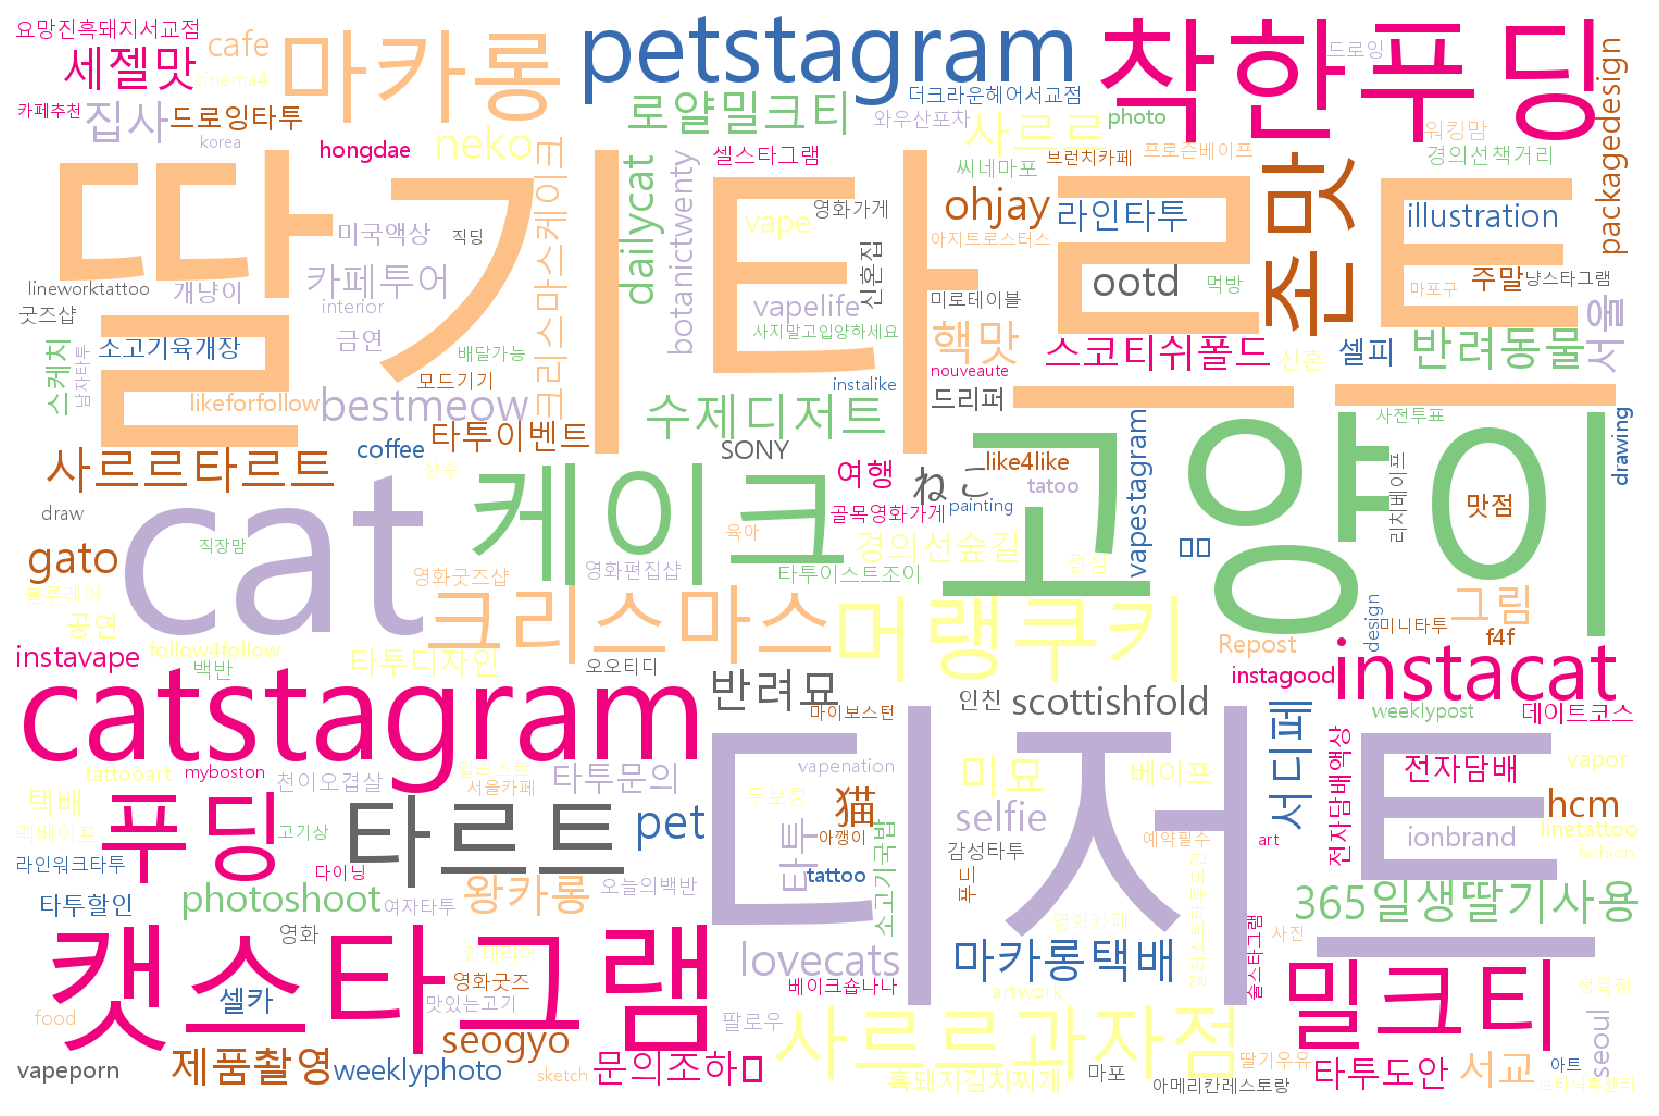

<Figure size 432x288 with 0 Axes>

In [578]:
draw_bar_graph(new_words2,"ÏÑúÍµêÎèô_ÏùºÎ∂ÄÎã®Ïñ¥Ï†úÍ±∞")
draw_wordcloud(new_words2,"ÏÑúÍµêÎèô_ÏùºÎ∂ÄÎã®Ïñ¥Ï†úÍ±∞")